In [337]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [338]:
import numpy as np
import pandas as pd
import seaborn as sns


In [339]:
from stats import mean, median, mode, multi_mode

ImportError: cannot import name 'multi_mode' from 'stats' (C:\Users\ruba\Anaconda3\lib\site-packages\stats.py)

In [314]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [315]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [316]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [317]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [318]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [319]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [320]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [321]:
engine.execute('SELECT * FROM measurement').fetchall()


[(1, 'USC00519397', '2010-01-01', 0.08, 65.0),
 (2, 'USC00519397', '2010-01-02', 0.0, 63.0),
 (3, 'USC00519397', '2010-01-03', 0.0, 74.0),
 (4, 'USC00519397', '2010-01-04', 0.0, 76.0),
 (5, 'USC00519397', '2010-01-06', None, 73.0),
 (6, 'USC00519397', '2010-01-07', 0.06, 70.0),
 (7, 'USC00519397', '2010-01-08', 0.0, 64.0),
 (8, 'USC00519397', '2010-01-09', 0.0, 68.0),
 (9, 'USC00519397', '2010-01-10', 0.0, 73.0),
 (10, 'USC00519397', '2010-01-11', 0.01, 64.0),
 (11, 'USC00519397', '2010-01-12', 0.0, 61.0),
 (12, 'USC00519397', '2010-01-14', 0.0, 66.0),
 (13, 'USC00519397', '2010-01-15', 0.0, 65.0),
 (14, 'USC00519397', '2010-01-16', 0.0, 68.0),
 (15, 'USC00519397', '2010-01-17', 0.0, 64.0),
 (16, 'USC00519397', '2010-01-18', 0.0, 72.0),
 (17, 'USC00519397', '2010-01-19', 0.0, 66.0),
 (18, 'USC00519397', '2010-01-20', 0.0, 66.0),
 (19, 'USC00519397', '2010-01-21', 0.0, 69.0),
 (20, 'USC00519397', '2010-01-22', 0.0, 67.0),
 (21, 'USC00519397', '2010-01-23', 0.0, 67.0),
 (22, 'USC00519397

In [322]:
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [323]:
columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [324]:
columns = inspector.get_columns('station')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [325]:
# Design a query to retrieve the last 12 months of precipitation data and plot the result

In [326]:
engine.execute("SELECT * FROM measurement WHERE date > '2016-08-23'").fetchall()

[(2365, 'USC00519397', '2016-08-24', 0.08, 79.0),
 (2366, 'USC00519397', '2016-08-25', 0.08, 80.0),
 (2367, 'USC00519397', '2016-08-26', 0.0, 79.0),
 (2368, 'USC00519397', '2016-08-27', 0.0, 77.0),
 (2369, 'USC00519397', '2016-08-28', 0.01, 78.0),
 (2370, 'USC00519397', '2016-08-29', 0.0, 78.0),
 (2371, 'USC00519397', '2016-08-30', 0.0, 79.0),
 (2372, 'USC00519397', '2016-08-31', 0.13, 80.0),
 (2373, 'USC00519397', '2016-09-01', 0.0, 81.0),
 (2374, 'USC00519397', '2016-09-02', 0.0, 80.0),
 (2375, 'USC00519397', '2016-09-03', 0.0, 79.0),
 (2376, 'USC00519397', '2016-09-04', 0.03, 75.0),
 (2377, 'USC00519397', '2016-09-05', None, 79.0),
 (2378, 'USC00519397', '2016-09-06', None, 76.0),
 (2379, 'USC00519397', '2016-09-07', 0.05, 76.0),
 (2380, 'USC00519397', '2016-09-08', 0.0, 80.0),
 (2381, 'USC00519397', '2016-09-09', 0.03, 79.0),
 (2382, 'USC00519397', '2016-09-10', 0.0, 78.0),
 (2383, 'USC00519397', '2016-09-11', 0.05, 76.0),
 (2384, 'USC00519397', '2016-09-12', 0.0, 78.0),
 (2385, 'U

In [327]:
prcp = session.query(Measurement.date,Measurement.prcp).filter(Measurement.date > '2016-08-23').order_by(Measurement.date).all()

In [328]:
prcp_df = pd.DataFrame(prcp, columns=['date','prcp'])
prcp_df.set_index('date').head()

,prcp
date,
2016-08-24,0.08
2016-08-24,2.15
2016-08-24,2.28
2016-08-24,NaN
2016-08-24,1.22


<Figure size 1440x360 with 0 Axes>

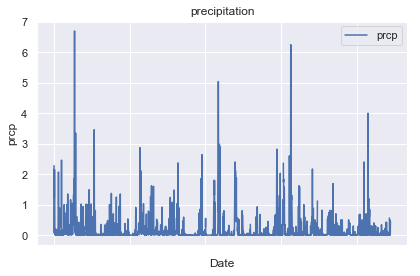

In [329]:
sns.set()
plt.figure(figsize=(20,5))
prcp_df.plot('date', 'prcp')
plt.grid(True)
plt.xlabel('Date')
plt.ylabel('prcp')
plt.title("precipitation")
plt.tight_layout()
plt.show()

In [330]:
prcp_df.head()

,date,prcp
0,2016-08-24,0.08
1,2016-08-24,2.15
2,2016-08-24,2.28
3,2016-08-24,NaN
4,2016-08-24,1.22


In [331]:
# Use Pandas to calcualte the summary statistics for the precipitation data

Stats_df = prcp_df.describe()

Stats_df.rename(columns = {'prcp' : 'Precipitation'})

,Precipitation
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [332]:
# Design a query to show how many stations are available in this dataset?
station = session.query(Measurement).group_by(Measurement.station).count()
print(station)

9


In [333]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.

for row in session.query(Measurement, Measurement.station).order_by(Measurement.station.desc()).all():
    print(row)

(<sqlalchemy.ext.automap.measurement object at 0x000001EF536DD438>, 'USC00519523')
(<sqlalchemy.ext.automap.measurement object at 0x000001EF513BE3C8>, 'USC00519523')
(<sqlalchemy.ext.automap.measurement object at 0x000001EF513BE320>, 'USC00519523')
(<sqlalchemy.ext.automap.measurement object at 0x000001EF513BE278>, 'USC00519523')
(<sqlalchemy.ext.automap.measurement object at 0x000001EF513BEF98>, 'USC00519523')
(<sqlalchemy.ext.automap.measurement object at 0x000001EF513BE0B8>, 'USC00519523')
(<sqlalchemy.ext.automap.measurement object at 0x000001EF513BE390>, 'USC00519523')
(<sqlalchemy.ext.automap.measurement object at 0x000001EF513BE8D0>, 'USC00519523')
(<sqlalchemy.ext.automap.measurement object at 0x000001EF513BE5C0>, 'USC00519523')
(<sqlalchemy.ext.automap.measurement object at 0x000001EF513BE898>, 'USC00519523')
(<sqlalchemy.ext.automap.measurement object at 0x000001EF513BE6D8>, 'USC00519523')
(<sqlalchemy.ext.automap.measurement object at 0x000001EF513BED30>, 'USC00519523')
(<sq

(<sqlalchemy.ext.automap.measurement object at 0x000001EF5411F4E0>, 'USC00519523')
(<sqlalchemy.ext.automap.measurement object at 0x000001EF5411F6A0>, 'USC00519523')
(<sqlalchemy.ext.automap.measurement object at 0x000001EF5411F0F0>, 'USC00519523')
(<sqlalchemy.ext.automap.measurement object at 0x000001EF5411FB00>, 'USC00519523')
(<sqlalchemy.ext.automap.measurement object at 0x000001EF5411F2E8>, 'USC00519523')
(<sqlalchemy.ext.automap.measurement object at 0x000001EF5411FD68>, 'USC00519523')
(<sqlalchemy.ext.automap.measurement object at 0x000001EF5411FAC8>, 'USC00519523')
(<sqlalchemy.ext.automap.measurement object at 0x000001EF5411F710>, 'USC00519523')
(<sqlalchemy.ext.automap.measurement object at 0x000001EF5411F4A8>, 'USC00519523')
(<sqlalchemy.ext.automap.measurement object at 0x000001EF5411F470>, 'USC00519523')
(<sqlalchemy.ext.automap.measurement object at 0x000001EF5411F438>, 'USC00519523')
(<sqlalchemy.ext.automap.measurement object at 0x000001EF5411F908>, 'USC00519523')
(<sq

(<sqlalchemy.ext.automap.measurement object at 0x000001EF540B8E80>, 'USC00519397')
(<sqlalchemy.ext.automap.measurement object at 0x000001EF540B8F98>, 'USC00519397')
(<sqlalchemy.ext.automap.measurement object at 0x000001EF540C10B8>, 'USC00519397')
(<sqlalchemy.ext.automap.measurement object at 0x000001EF540C11D0>, 'USC00519397')
(<sqlalchemy.ext.automap.measurement object at 0x000001EF540C12B0>, 'USC00519397')
(<sqlalchemy.ext.automap.measurement object at 0x000001EF540C13C8>, 'USC00519397')
(<sqlalchemy.ext.automap.measurement object at 0x000001EF540C14A8>, 'USC00519397')
(<sqlalchemy.ext.automap.measurement object at 0x000001EF540C15C0>, 'USC00519397')
(<sqlalchemy.ext.automap.measurement object at 0x000001EF540C16A0>, 'USC00519397')
(<sqlalchemy.ext.automap.measurement object at 0x000001EF540C17B8>, 'USC00519397')
(<sqlalchemy.ext.automap.measurement object at 0x000001EF540C1898>, 'USC00519397')
(<sqlalchemy.ext.automap.measurement object at 0x000001EF540C19B0>, 'USC00519397')
(<sq

(<sqlalchemy.ext.automap.measurement object at 0x000001EF52891F60>, 'USC00519397')
(<sqlalchemy.ext.automap.measurement object at 0x000001EF52895048>, 'USC00519397')
(<sqlalchemy.ext.automap.measurement object at 0x000001EF528950F0>, 'USC00519397')
(<sqlalchemy.ext.automap.measurement object at 0x000001EF52895198>, 'USC00519397')
(<sqlalchemy.ext.automap.measurement object at 0x000001EF52895240>, 'USC00519397')
(<sqlalchemy.ext.automap.measurement object at 0x000001EF528952E8>, 'USC00519397')
(<sqlalchemy.ext.automap.measurement object at 0x000001EF52895390>, 'USC00519397')
(<sqlalchemy.ext.automap.measurement object at 0x000001EF52895438>, 'USC00519397')
(<sqlalchemy.ext.automap.measurement object at 0x000001EF528954E0>, 'USC00519397')
(<sqlalchemy.ext.automap.measurement object at 0x000001EF52895588>, 'USC00519397')
(<sqlalchemy.ext.automap.measurement object at 0x000001EF52895630>, 'USC00519397')
(<sqlalchemy.ext.automap.measurement object at 0x000001EF528956D8>, 'USC00519397')
(<sq

(<sqlalchemy.ext.automap.measurement object at 0x000001EF52AC0780>, 'USC00519281')
(<sqlalchemy.ext.automap.measurement object at 0x000001EF52AC0828>, 'USC00519281')
(<sqlalchemy.ext.automap.measurement object at 0x000001EF52AC08D0>, 'USC00519281')
(<sqlalchemy.ext.automap.measurement object at 0x000001EF52AC0978>, 'USC00519281')
(<sqlalchemy.ext.automap.measurement object at 0x000001EF52AC0A20>, 'USC00519281')
(<sqlalchemy.ext.automap.measurement object at 0x000001EF52AC0AC8>, 'USC00519281')
(<sqlalchemy.ext.automap.measurement object at 0x000001EF52AC0B70>, 'USC00519281')
(<sqlalchemy.ext.automap.measurement object at 0x000001EF52AC0C18>, 'USC00519281')
(<sqlalchemy.ext.automap.measurement object at 0x000001EF52AC0CC0>, 'USC00519281')
(<sqlalchemy.ext.automap.measurement object at 0x000001EF52AC0D68>, 'USC00519281')
(<sqlalchemy.ext.automap.measurement object at 0x000001EF52AC0E10>, 'USC00519281')
(<sqlalchemy.ext.automap.measurement object at 0x000001EF52AC0EB8>, 'USC00519281')
(<sq

(<sqlalchemy.ext.automap.measurement object at 0x000001EF534FFEB8>, 'USC00519281')
(<sqlalchemy.ext.automap.measurement object at 0x000001EF534FFF60>, 'USC00519281')
(<sqlalchemy.ext.automap.measurement object at 0x000001EF5342A048>, 'USC00519281')
(<sqlalchemy.ext.automap.measurement object at 0x000001EF5342A0F0>, 'USC00519281')
(<sqlalchemy.ext.automap.measurement object at 0x000001EF5342A198>, 'USC00519281')
(<sqlalchemy.ext.automap.measurement object at 0x000001EF5342A240>, 'USC00519281')
(<sqlalchemy.ext.automap.measurement object at 0x000001EF5342A2E8>, 'USC00519281')
(<sqlalchemy.ext.automap.measurement object at 0x000001EF5342A390>, 'USC00519281')
(<sqlalchemy.ext.automap.measurement object at 0x000001EF5342A438>, 'USC00519281')
(<sqlalchemy.ext.automap.measurement object at 0x000001EF5342A4E0>, 'USC00519281')
(<sqlalchemy.ext.automap.measurement object at 0x000001EF5342A588>, 'USC00519281')
(<sqlalchemy.ext.automap.measurement object at 0x000001EF5342A630>, 'USC00519281')
(<sq

(<sqlalchemy.ext.automap.measurement object at 0x000001EF544D6F98>, 'USC00517948')
(<sqlalchemy.ext.automap.measurement object at 0x000001EF52C1E048>, 'USC00517948')
(<sqlalchemy.ext.automap.measurement object at 0x000001EF52C1E0F0>, 'USC00517948')
(<sqlalchemy.ext.automap.measurement object at 0x000001EF52C1E198>, 'USC00517948')
(<sqlalchemy.ext.automap.measurement object at 0x000001EF52C1E240>, 'USC00517948')
(<sqlalchemy.ext.automap.measurement object at 0x000001EF52C1E2E8>, 'USC00517948')
(<sqlalchemy.ext.automap.measurement object at 0x000001EF52C1E390>, 'USC00517948')
(<sqlalchemy.ext.automap.measurement object at 0x000001EF52C1E438>, 'USC00517948')
(<sqlalchemy.ext.automap.measurement object at 0x000001EF52C1E4E0>, 'USC00517948')
(<sqlalchemy.ext.automap.measurement object at 0x000001EF52C1E588>, 'USC00517948')
(<sqlalchemy.ext.automap.measurement object at 0x000001EF52C1E630>, 'USC00517948')
(<sqlalchemy.ext.automap.measurement object at 0x000001EF52C1E6D8>, 'USC00517948')
(<sq

(<sqlalchemy.ext.automap.measurement object at 0x000001EF527D86D8>, 'USC00516128')
(<sqlalchemy.ext.automap.measurement object at 0x000001EF527D8780>, 'USC00516128')
(<sqlalchemy.ext.automap.measurement object at 0x000001EF527D8828>, 'USC00516128')
(<sqlalchemy.ext.automap.measurement object at 0x000001EF527D88D0>, 'USC00516128')
(<sqlalchemy.ext.automap.measurement object at 0x000001EF527D8978>, 'USC00516128')
(<sqlalchemy.ext.automap.measurement object at 0x000001EF527D8A20>, 'USC00516128')
(<sqlalchemy.ext.automap.measurement object at 0x000001EF527D8AC8>, 'USC00516128')
(<sqlalchemy.ext.automap.measurement object at 0x000001EF527D8B70>, 'USC00516128')
(<sqlalchemy.ext.automap.measurement object at 0x000001EF527D8C18>, 'USC00516128')
(<sqlalchemy.ext.automap.measurement object at 0x000001EF527D8CC0>, 'USC00516128')
(<sqlalchemy.ext.automap.measurement object at 0x000001EF527D8D68>, 'USC00516128')
(<sqlalchemy.ext.automap.measurement object at 0x000001EF527D8E10>, 'USC00516128')
(<sq

(<sqlalchemy.ext.automap.measurement object at 0x000001EF52CFBEB8>, 'USC00516128')
(<sqlalchemy.ext.automap.measurement object at 0x000001EF52CFBF60>, 'USC00516128')
(<sqlalchemy.ext.automap.measurement object at 0x000001EF52D44048>, 'USC00516128')
(<sqlalchemy.ext.automap.measurement object at 0x000001EF52D440F0>, 'USC00516128')
(<sqlalchemy.ext.automap.measurement object at 0x000001EF52D44198>, 'USC00516128')
(<sqlalchemy.ext.automap.measurement object at 0x000001EF52D44240>, 'USC00516128')
(<sqlalchemy.ext.automap.measurement object at 0x000001EF52D442E8>, 'USC00516128')
(<sqlalchemy.ext.automap.measurement object at 0x000001EF52D44390>, 'USC00516128')
(<sqlalchemy.ext.automap.measurement object at 0x000001EF52D44438>, 'USC00516128')
(<sqlalchemy.ext.automap.measurement object at 0x000001EF52D444E0>, 'USC00516128')
(<sqlalchemy.ext.automap.measurement object at 0x000001EF52D44588>, 'USC00516128')
(<sqlalchemy.ext.automap.measurement object at 0x000001EF52D44630>, 'USC00516128')
(<sq

(<sqlalchemy.ext.automap.measurement object at 0x000001EF530FE630>, 'USC00514830')
(<sqlalchemy.ext.automap.measurement object at 0x000001EF530FE6D8>, 'USC00514830')
(<sqlalchemy.ext.automap.measurement object at 0x000001EF530FE780>, 'USC00514830')
(<sqlalchemy.ext.automap.measurement object at 0x000001EF530FE828>, 'USC00514830')
(<sqlalchemy.ext.automap.measurement object at 0x000001EF530FE8D0>, 'USC00514830')
(<sqlalchemy.ext.automap.measurement object at 0x000001EF530FE978>, 'USC00514830')
(<sqlalchemy.ext.automap.measurement object at 0x000001EF530FEA20>, 'USC00514830')
(<sqlalchemy.ext.automap.measurement object at 0x000001EF530FEAC8>, 'USC00514830')
(<sqlalchemy.ext.automap.measurement object at 0x000001EF530FEB70>, 'USC00514830')
(<sqlalchemy.ext.automap.measurement object at 0x000001EF530FEC18>, 'USC00514830')
(<sqlalchemy.ext.automap.measurement object at 0x000001EF530FECC0>, 'USC00514830')
(<sqlalchemy.ext.automap.measurement object at 0x000001EF530FED68>, 'USC00514830')
(<sq

(<sqlalchemy.ext.automap.measurement object at 0x000001EF54CB9E10>, 'USC00513117')
(<sqlalchemy.ext.automap.measurement object at 0x000001EF54CB9EB8>, 'USC00513117')
(<sqlalchemy.ext.automap.measurement object at 0x000001EF54CB9F60>, 'USC00513117')
(<sqlalchemy.ext.automap.measurement object at 0x000001EF54F43048>, 'USC00513117')
(<sqlalchemy.ext.automap.measurement object at 0x000001EF54F430F0>, 'USC00513117')
(<sqlalchemy.ext.automap.measurement object at 0x000001EF54F43198>, 'USC00513117')
(<sqlalchemy.ext.automap.measurement object at 0x000001EF54F43240>, 'USC00513117')
(<sqlalchemy.ext.automap.measurement object at 0x000001EF54F432E8>, 'USC00513117')
(<sqlalchemy.ext.automap.measurement object at 0x000001EF54F43390>, 'USC00513117')
(<sqlalchemy.ext.automap.measurement object at 0x000001EF54F43438>, 'USC00513117')
(<sqlalchemy.ext.automap.measurement object at 0x000001EF54F434E0>, 'USC00513117')
(<sqlalchemy.ext.automap.measurement object at 0x000001EF54F43588>, 'USC00513117')
(<sq

(<sqlalchemy.ext.automap.measurement object at 0x000001EF552FC588>, 'USC00513117')
(<sqlalchemy.ext.automap.measurement object at 0x000001EF552FC630>, 'USC00513117')
(<sqlalchemy.ext.automap.measurement object at 0x000001EF552FC6D8>, 'USC00513117')
(<sqlalchemy.ext.automap.measurement object at 0x000001EF552FC780>, 'USC00513117')
(<sqlalchemy.ext.automap.measurement object at 0x000001EF552FC828>, 'USC00513117')
(<sqlalchemy.ext.automap.measurement object at 0x000001EF552FC8D0>, 'USC00513117')
(<sqlalchemy.ext.automap.measurement object at 0x000001EF552FC978>, 'USC00513117')
(<sqlalchemy.ext.automap.measurement object at 0x000001EF552FCA20>, 'USC00513117')
(<sqlalchemy.ext.automap.measurement object at 0x000001EF552FCAC8>, 'USC00513117')
(<sqlalchemy.ext.automap.measurement object at 0x000001EF552FCB70>, 'USC00513117')
(<sqlalchemy.ext.automap.measurement object at 0x000001EF552FCC18>, 'USC00513117')
(<sqlalchemy.ext.automap.measurement object at 0x000001EF552FCCC0>, 'USC00513117')
(<sq

(<sqlalchemy.ext.automap.measurement object at 0x000001EF55708940>, 'USC00511918')
(<sqlalchemy.ext.automap.measurement object at 0x000001EF557089E8>, 'USC00511918')
(<sqlalchemy.ext.automap.measurement object at 0x000001EF55708A90>, 'USC00511918')
(<sqlalchemy.ext.automap.measurement object at 0x000001EF55708B38>, 'USC00511918')
(<sqlalchemy.ext.automap.measurement object at 0x000001EF55708BE0>, 'USC00511918')
(<sqlalchemy.ext.automap.measurement object at 0x000001EF55708C88>, 'USC00511918')
(<sqlalchemy.ext.automap.measurement object at 0x000001EF55708D30>, 'USC00511918')
(<sqlalchemy.ext.automap.measurement object at 0x000001EF55708DD8>, 'USC00511918')
(<sqlalchemy.ext.automap.measurement object at 0x000001EF55708E80>, 'USC00511918')
(<sqlalchemy.ext.automap.measurement object at 0x000001EF55708F28>, 'USC00511918')
(<sqlalchemy.ext.automap.measurement object at 0x000001EF55708FD0>, 'USC00511918')
(<sqlalchemy.ext.automap.measurement object at 0x000001EF557110B8>, 'USC00511918')
(<sq

In [334]:
station = session.query(Measurement).group_by(Measurement.station).count()
print(row)

(<sqlalchemy.ext.automap.measurement object at 0x000001EF558FC5F8>, 'USC00511918')


In [335]:
station = session.query(Measurement.station, func.count(Measurement.tobs)).group_by(Measurement.station).order_by(func.count(Measurement.tobs).desc())
station.all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [336]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
station_query = session.query(func.min(Measurement.tobs),func.max(Measurement.tobs),func.avg(Measurement.tobs)).all()
station_query



[(53.0, 87.0, 73.09795396419437)]

# Exploratory Climate Analysis

In [303]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
station_name = session.query(func.max(Measurement.tobs),(Measurement.station)).all()
station_name

[(87.0, 'USC00519397')]

In [304]:
station_temp = session.query(Measurement.station,Measurement.tobs).filter(Measurement.date > '2016-08-23').filter(Measurement.station=='USC00519397').all()
station_temp

[('USC00519397', 79.0),
 ('USC00519397', 80.0),
 ('USC00519397', 79.0),
 ('USC00519397', 77.0),
 ('USC00519397', 78.0),
 ('USC00519397', 78.0),
 ('USC00519397', 79.0),
 ('USC00519397', 80.0),
 ('USC00519397', 81.0),
 ('USC00519397', 80.0),
 ('USC00519397', 79.0),
 ('USC00519397', 75.0),
 ('USC00519397', 79.0),
 ('USC00519397', 76.0),
 ('USC00519397', 76.0),
 ('USC00519397', 80.0),
 ('USC00519397', 79.0),
 ('USC00519397', 78.0),
 ('USC00519397', 76.0),
 ('USC00519397', 78.0),
 ('USC00519397', 78.0),
 ('USC00519397', 75.0),
 ('USC00519397', 79.0),
 ('USC00519397', 80.0),
 ('USC00519397', 79.0),
 ('USC00519397', 81.0),
 ('USC00519397', 77.0),
 ('USC00519397', 77.0),
 ('USC00519397', 78.0),
 ('USC00519397', 76.0),
 ('USC00519397', 82.0),
 ('USC00519397', 81.0),
 ('USC00519397', 78.0),
 ('USC00519397', 80.0),
 ('USC00519397', 80.0),
 ('USC00519397', 79.0),
 ('USC00519397', 80.0),
 ('USC00519397', 80.0),
 ('USC00519397', 80.0),
 ('USC00519397', 79.0),
 ('USC00519397', 79.0),
 ('USC00519397',

In [305]:
station_temp_df = pd.DataFrame(station_temp)

station_temp_df.count()

station    360
tobs       360
dtype: int64

In [306]:
station_temp_df.head()

,station,tobs
0,USC00519397,79.0
1,USC00519397,80.0
2,USC00519397,79.0
3,USC00519397,77.0
4,USC00519397,78.0


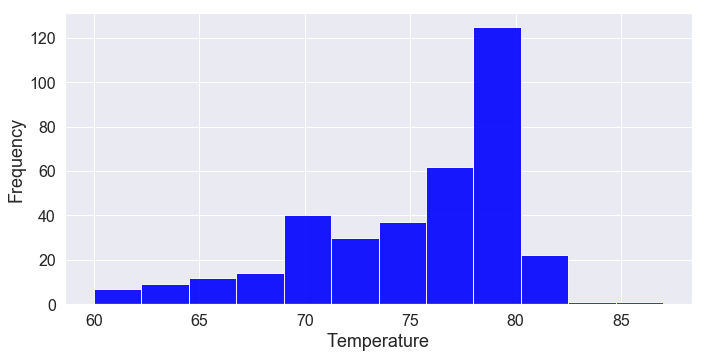

In [307]:
sns.set()
x = station_temp_df['tobs']
num_bins = 12
plt.figure(figsize=[10, 5])
temp_plot = plt.hist(x, num_bins, facecolor='blue', label='tobs', alpha=0.9)
plt.xlabel('Temperature', fontsize=18)
plt.ylabel('Frequency', fontsize=18)
plt.tick_params(axis='y', labelsize=16)
plt.tick_params(axis='x', labelsize=16)

plt.show()
